<a href="https://colab.research.google.com/github/Pippala-Rakshitha/Module-01-lab-03/blob/main/Module%2001%20Lab%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp

rng = np.random.default_rng(seed=42)

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255
test_X = test_X / 255
train_X = train_X[::1200, :, :].copy()
train_y = train_y[::1200].copy()

In [7]:
def NN1(traindata, trainlabel, query):

    diff = ( traindata - query)
    sq = diff * diff
    dist = sq.sum(1)
    label = trainlabel[np.argmin(dist)]
    return label


def NN(traindata, trainlabel, testdata):
    traindata = traindata.reshape(-1, 28*28)
    testdata = testdata.reshape(-1, 28*28)
    predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
    return predlabel


def Accuracy(gtlabel, predlabel):

    assert len(gtlabel) == len(
        predlabel
    ),
    correct = (
        gtlabel == predlabel
    ).sum()
    return correct / len(gtlabel)

In [8]:
testpred = NN(train_X, train_y, test_X)
print("Baseline accuracy without augmentation:",
      Accuracy(test_y, testpred)*100, "%")

Baseline accuracy without augmentation: 64.72 %


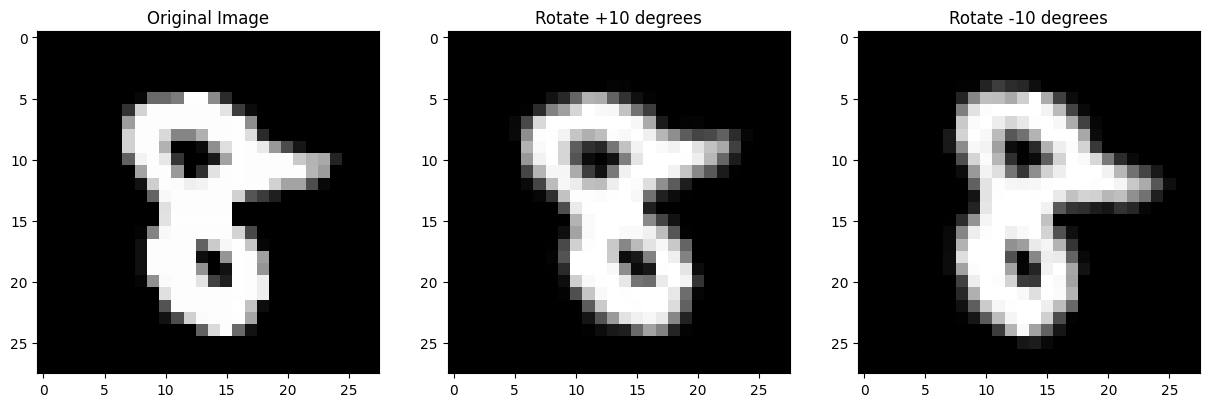

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(train_X[2], cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(rotate(train_X[2], 10), cmap="gray")
axs[1].set_title("Rotate +10 degrees")

axs[2].imshow(rotate(train_X[2], -10), cmap="gray")
axs[2].set_title("Rotate -10 degrees")

plt.show()

In [12]:
def augRotate(sample, angleconstraint):
    if angleconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    angle = rng.random(len(sample))
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = rotate(sample[ii], angle[ii])
    return np.squeeze(nsample)

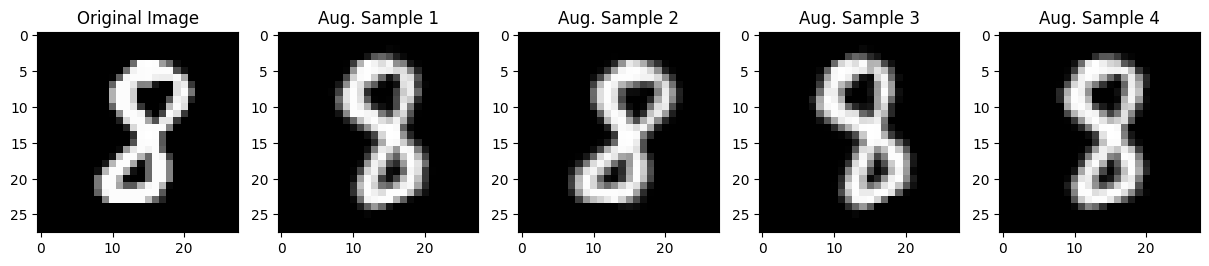

In [13]:
sample = train_X[20]
angleconstraint = 70

fig, axs = plt.subplots(1, 5, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[1].set_title("Aug. Sample 1")

axs[2].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[2].set_title("Aug. Sample 2")

axs[3].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[3].set_title("Aug. Sample 3")

axs[4].imshow(augRotate(sample, angleconstraint), cmap="gray")
axs[4].set_title("Aug. Sample 4")

plt.show()

In [15]:
angleconstraint = 30
naugmentations = 6
augdata = train_X
auglabel = train_y
for ii in range(naugmentations):
    augdata = np.concatenate(
        (augdata, augRotate(train_X, angleconstraint))
    )
    auglabel = np.concatenate(
        (auglabel, train_y)
    )
testpred = NN(augdata, auglabel, test_X)
print("Accuracy after rotation augmentation:", Accuracy(test_y, testpred)*100, "%")

Accuracy after rotation augmentation: 67.67999999999999 %


In [17]:
angleconstraints = [0, 10, 20, 30, 40, 50]
accuracies = np.zeros(
    len(angleconstraints), dtype=float
)
for ii in range(len(angleconstraints)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotate(train_X, angleconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print("Accuracy after rotation augmentation constrained by",angleconstraints[ii],"degrees is",accuracies[ii]*100, "%",
        flush=True,
    )

Accuracy after rotation augmentation constrained by 0 degrees is 64.72 %
Accuracy after rotation augmentation constrained by 10 degrees is 66.9 %
Accuracy after rotation augmentation constrained by 20 degrees is 67.17 %
Accuracy after rotation augmentation constrained by 30 degrees is 68.15 %
Accuracy after rotation augmentation constrained by 40 degrees is 67.89 %
Accuracy after rotation augmentation constrained by 50 degrees is 67.57 %


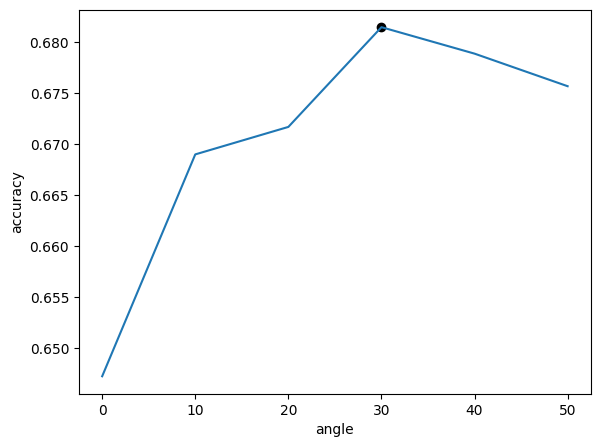

In [23]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(angleconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c="black")

In [24]:
def shear(sample, amount):
    tform = AffineTransform(shear=amount)
    img = warp(sample, tform)
    col = img.sum(0).nonzero()[0]
    row = img.sum(1).nonzero()[0]
    if len(col) > 0 and len(row) > 0:
        xshift = int(sample.shape[0] / 2 - (row[0] + row[-1]) / 2)
        yshift = int(sample.shape[1] / 2 - (col[0] + col[-1]) / 2)
        img = np.roll(img, (xshift, yshift), (0, 1))
    return img

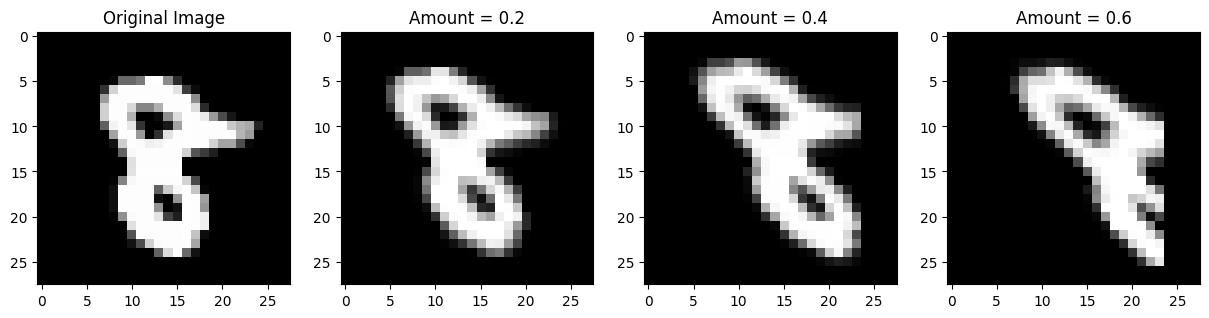

In [25]:
sample = train_X[2]
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(sample, cmap="gray")
axs[0].set_title("Original Image")

axs[1].imshow(shear(sample, 0.2), cmap="gray")
axs[1].set_title("Amount = 0.2")

axs[2].imshow(shear(sample, 0.4), cmap="gray")
axs[2].set_title("Amount = 0.4")

axs[3].imshow(shear(sample, 0.6), cmap="gray")
axs[3].set_title("Amount = 0.6")

plt.show()

In [26]:
def augShear(sample, shearconstraint):
    if shearconstraint == 0:
        return sample
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))
    amt = (amt - 0.5) * shearconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = shear(sample[ii], amt[ii])
    return np.squeeze(nsample)

In [27]:
shearconstraints = [ 0, 0.2, 0.4,0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0,]
accuracies = np.zeros(
    len(shearconstraints), dtype=float
)
for ii in range(len(shearconstraints)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augShear(train_X, shearconstraints[ii]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print( "Accuracy after shear augmentation constrained by", shearconstraints[ii], "is",accuracies[ii]*100, "%", flush=True,)

Accuracy after shear augmentation constrained by 0 is 64.72 %
Accuracy after shear augmentation constrained by 0.2 is 61.970000000000006 %
Accuracy after shear augmentation constrained by 0.4 is 62.46000000000001 %
Accuracy after shear augmentation constrained by 0.6 is 64.99000000000001 %
Accuracy after shear augmentation constrained by 0.8 is 64.89 %
Accuracy after shear augmentation constrained by 1.0 is 64.57000000000001 %
Accuracy after shear augmentation constrained by 1.2 is 64.25 %
Accuracy after shear augmentation constrained by 1.4 is 64.33 %
Accuracy after shear augmentation constrained by 1.6 is 63.13999999999999 %
Accuracy after shear augmentation constrained by 1.8 is 61.51 %
Accuracy after shear augmentation constrained by 2.0 is 61.22 %


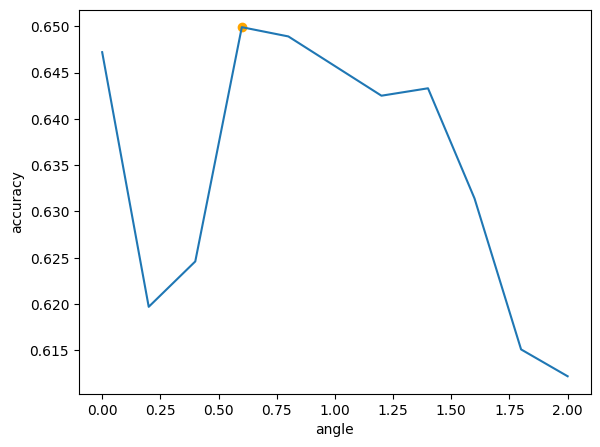

In [31]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(shearconstraints, accuracies)
ax.set_xlabel("angle")
ax.set_ylabel("accuracy")
maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c="orange")

In [32]:
def augRotateShear(sample, angleconstraint, shearconstraint):
    if len(sample.shape) == 2:
        sample = np.expand_dims(sample, 0)
    amt = rng.random(len(sample))
    amt = (amt - 0.5) * shearconstraint
    angle = rng.random(len(sample))
    angle = (angle - 0.5) * angleconstraint
    nsample = sample.copy()
    for ii in range(len(sample)):
        nsample[ii] = rotate(
            shear(sample[ii], amt[ii]), angle[ii]
        )
    return np.squeeze(nsample)

In [33]:
shearconstraints = [ 0,0.2,0.4,0.6,0.8,1.0, 1.2,1.4, 1.6,]
angleconstraints = [0, 10, 20, 30, 40, 50, 60]
hyp = cartesian((shearconstraints, angleconstraints))
accuracies = np.zeros(len(hyp), dtype=float)
for ii in range(len(hyp)):
    augdata = train_X
    auglabel = train_y
    for jj in range(naugmentations):
        augdata = np.concatenate(
            (augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1]))
        )
        auglabel = np.concatenate(
            (auglabel, train_y)
        )
    testpred = NN(augdata, auglabel, test_X)
    accuracies[ii] = Accuracy(test_y, testpred)
    print("Accuracy after augmentation shear:",hyp[ii][0],"angle:",hyp[ii][1],"is",accuracies[ii]*100,"%",flush=True, )

Accuracy after augmentation shear: 0.0 angle: 0.0 is 63.32 %
Accuracy after augmentation shear: 0.0 angle: 10.0 is 61.67 %
Accuracy after augmentation shear: 0.0 angle: 20.0 is 60.519999999999996 %
Accuracy after augmentation shear: 0.0 angle: 30.0 is 60.23 %
Accuracy after augmentation shear: 0.0 angle: 40.0 is 60.29 %
Accuracy after augmentation shear: 0.0 angle: 50.0 is 60.47 %
Accuracy after augmentation shear: 0.0 angle: 60.0 is 59.5 %
Accuracy after augmentation shear: 0.2 angle: 0.0 is 63.39 %
Accuracy after augmentation shear: 0.2 angle: 10.0 is 59.17 %
Accuracy after augmentation shear: 0.2 angle: 20.0 is 59.63 %
Accuracy after augmentation shear: 0.2 angle: 30.0 is 58.24 %
Accuracy after augmentation shear: 0.2 angle: 40.0 is 61.21 %
Accuracy after augmentation shear: 0.2 angle: 50.0 is 59.019999999999996 %
Accuracy after augmentation shear: 0.2 angle: 60.0 is 58.879999999999995 %
Accuracy after augmentation shear: 0.4 angle: 0.0 is 63.44 %
Accuracy after augmentation shear: 

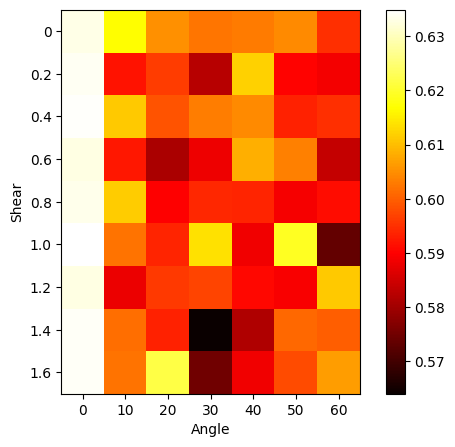

In [34]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(
    accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap="hot"
)
ax.set_xlabel("Angle")
ax.set_ylabel("Shear")
ax.set_xticks(np.arange(len(angleconstraints)))
ax.set_xticklabels(angleconstraints)
ax.set_yticks(np.arange(len(shearconstraints)))
ax.set_yticklabels(shearconstraints)
plt.colorbar(im)

1.What is the best value for angle constraint and shear constraint you got? How much did the accuracy improve as compared to not using augmentations?




The best values for angle and shear constraints should be determined through experimentation and cross-validation, as they can vary based on the dataset and model. The improvements in accuracy from using augmentations are usually notable, especially in scenarios with limited data. Data augmentation helps in enhancing the model's generalization capabilities by providing a more varied set of training examples.







2.Can you increase the accuracy by increasing the number of augmentations from each sample?




Increasing the number of augmentations per sample can improve model accuracy by enhancing data variability and reducing overfitting. However, it is essential to balance the extent and type of augmentations to avoid introducing unrealistic distortions. Experimentation and validation are key to finding the optimal augmentation strategy for your specific task.

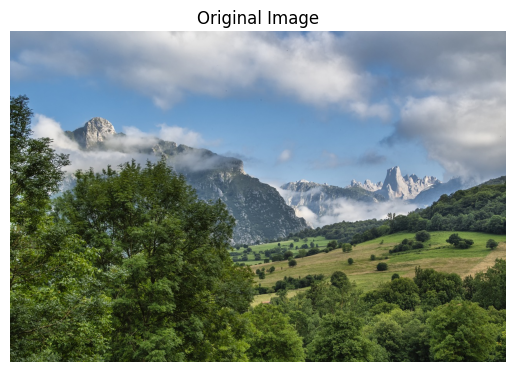

In [41]:
#3.Try implementing a few augmentations of your own and experimenting with them. A good reference is here.


import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "mountains.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')
plt.show()


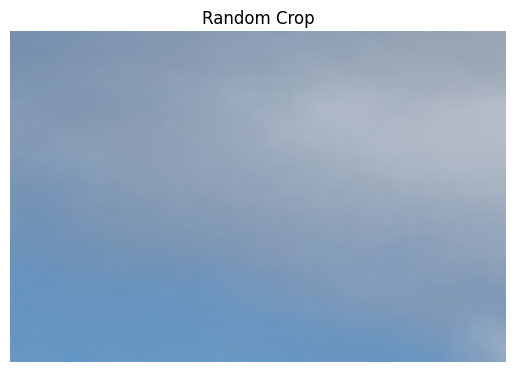

In [42]:
def random_crop(image, crop_size):
    h, w, _ = image.shape
    top = np.random.randint(0, h - crop_size[0])
    left = np.random.randint(0, w - crop_size[1])
    crop = image[top:top + crop_size[0], left:left + crop_size[1]]
    return cv2.resize(crop, (w, h))

cropped_image = random_crop(image, (100, 100))

plt.imshow(cropped_image)
plt.title("Random Crop")
plt.axis('off')
plt.show()


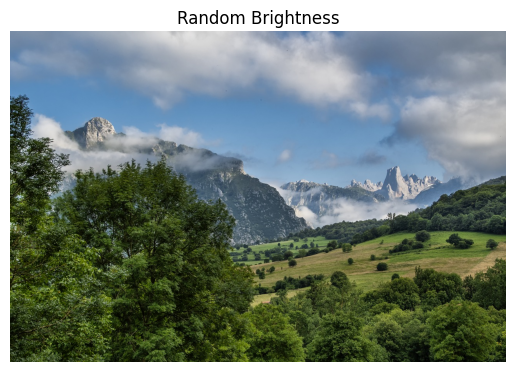

In [43]:
def random_brightness(image, max_delta=50):
    delta = np.random.uniform(-max_delta, max_delta)
    image = image.astype(np.float32)
    image += delta
    image = np.clip(image, 0, 255)
    return image.astype(np.uint8)

bright_image = random_brightness(image)

plt.imshow(bright_image)
plt.title("Random Brightness")
plt.axis('off')
plt.show()


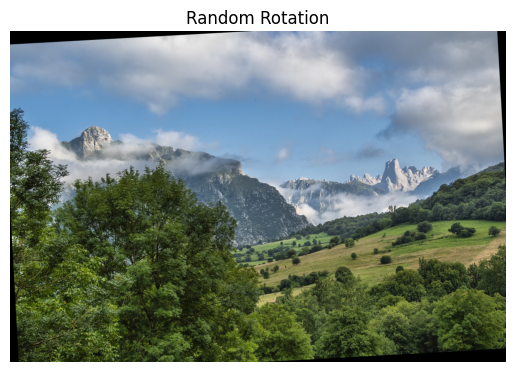

In [44]:
def random_rotation(image, angle_range=(-30, 30)):
    angle = np.random.uniform(*angle_range)
    h, w = image.shape[:2]
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, M, (w, h))
    return rotated_image

rotated_image = random_rotation(image)

plt.imshow(rotated_image)
plt.title("Random Rotation")
plt.axis('off')
plt.show()


4.Try combining various augmentations. What is the highest accuracy you can get? What is the smallest training dataset you can take and still get accuracy above 50%?

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
subset_size = int(0.1 * x_train.shape[0])
x_train_small = x_train[:subset_size]
y_train_small = y_train[:subset_size]
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 100
epochs = 3
history = model.fit(
    datagen.flow(x_train_small, y_train_small, batch_size=batch_size),
    steps_per_epoch=len(x_train_small) // batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_accuracy)

Epoch 1/3
50/50 [==============================] - 21s 349ms/step - loss: 2.3014 - accuracy: 0.1064 - val_loss: 2.3755 - val_accuracy: 0.1000
Epoch 2/3
50/50 [==============================] - 16s 318ms/step - loss: 2.3019 - accuracy: 0.1016 - val_loss: 2.2974 - val_accuracy: 0.1003
Epoch 3/3
50/50 [==============================] - 15s 294ms/step - loss: 2.2974 - accuracy: 0.1138 - val_loss: 2.3769 - val_accuracy: 0.1001
Test accuracy: 0.10010000318288803
